所谓密度估计器： 一种利用D维数据生成D维概率分布估计的算法

GMM用不同高斯分布的加权汇总来表示概率分布估计

KDE算法将GMM扩展到了逻辑极限（logical extreme）。 它通过对 每个点 生成给高斯分布的混合成分，获得本质上是无参数的密度估计器

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Motivating KDE: Histograms

1 - dimension data's density estimation----histograms:

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

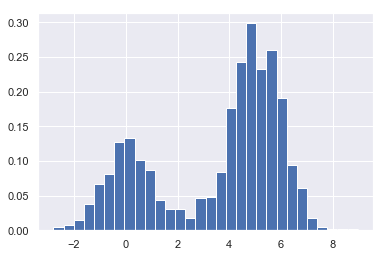

In [3]:
hist = plt.hist(x, bins=30, normed=True)

In [4]:
#总面积为1：
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

注意使用直方图时： 区间大小和位置的选择不同，产生的统计特征也不同

例如只看数据中的20个点，选择不同的区间将会出现完全不同的解读方式：

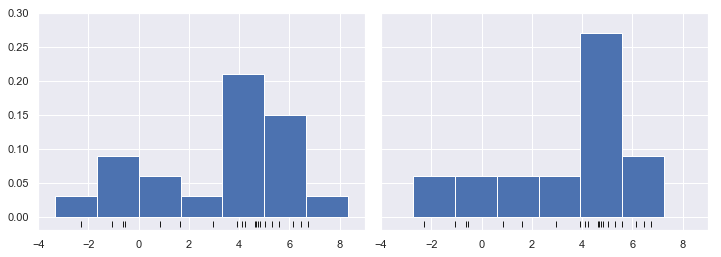

In [5]:
x = make_data(20)
bins = np.linspace(-5,10,10)
fig,ax = plt.subplots(1,2,figsize=(12,4),sharex = True, sharey=True, subplot_kw={'xlim':(-4,9),'ylim':(-0.02,0.3)})

fig.subplots_adjust(wspace=0.05)
for i,offset in enumerate([0.0,0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

其实是同一组数据，但由于可视化设置的问题， 让人第一感觉会觉得是来自两个分布的数据  

how to solve that prob?

(-0.2, 8)

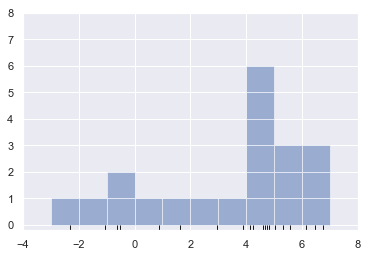

In [6]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',
        markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,
                                   alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)